In [75]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [76]:
df = pd.read_csv('data.csv')

In [77]:
df.head()

number_people                       date  timestamp  day_of_week  \
0             37  2018-08-14 17:00:11-07:00      61211            4   
1             45  2018-08-14 17:20:14-07:00      62414            4   
2             40  2018-08-14 17:30:15-07:00      63015            4   
3             44  2018-08-14 17:40:16-07:00      63616            4   
4             45  2018-08-14 17:50:17-07:00      64217            4   

   is_weekend  is_holiday  temperature  is_start_of_semester  \
0           0           0        71.76                     0   
1           0           0        71.76                     0   
2           0           0        71.76                     0   
3           0           0        71.76                     0   
4           0           0        71.76                     0   

   is_during_semester  month  hour  
0                   0      8    17  
1                   0      8    17  
2                   0      8    17  
3                   0      8    17  
4                   0      8    17

In [81]:
df['date'] = pd.to_datetime(df['date'], utc=True)
dfdt = df.set_index('date')

In [82]:
dfdt = dfdt['number_people']
dfdt = pd.Series(dfdt)
dfdt

date
2018-08-15 00:00:11+00:00    37
2018-08-15 00:20:14+00:00    45
2018-08-15 00:30:15+00:00    40
2018-08-15 00:40:16+00:00    44
2018-08-15 00:50:17+00:00    45
                             ..
2020-03-19 01:42:28+00:00    23
2020-03-19 01:52:35+00:00    21
2020-03-19 02:02:40+00:00    25
2020-03-19 02:12:47+00:00    18
2020-03-19 02:22:51+00:00    23
Name: number_people, Length: 62098, dtype: int64

(<Figure size 900x367.2 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3583C2D48>,
       dtype=object))

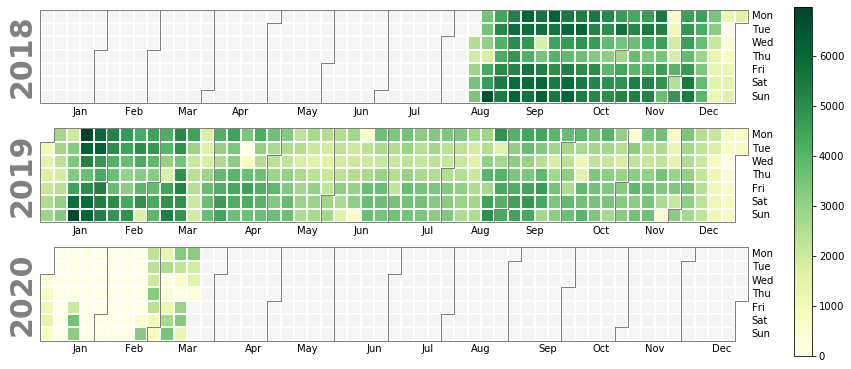

In [83]:
import calplot
calplot.calplot(dfdt, cmap='YlGn')

In [84]:
daydict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week'].replace(daydict, inplace=True)
df.head()

number_people                      date  timestamp day_of_week  is_weekend  \
0             37 2018-08-15 00:00:11+00:00      61211      Friday           0   
1             45 2018-08-15 00:20:14+00:00      62414      Friday           0   
2             40 2018-08-15 00:30:15+00:00      63015      Friday           0   
3             44 2018-08-15 00:40:16+00:00      63616      Friday           0   
4             45 2018-08-15 00:50:17+00:00      64217      Friday           0   

   is_holiday  temperature  is_start_of_semester  is_during_semester  month  \
0           0        71.76                     0                   0      8   
1           0        71.76                     0                   0      8   
2           0        71.76                     0                   0      8   
3           0        71.76                     0                   0      8   
4           0        71.76                     0                   0      8   

   hour  
0    17  
1    17  
2    17  
3    17  
4    17

In [85]:
df.describe()

number_people     timestamp    is_weekend    is_holiday   temperature  \
count   62098.000000  62098.000000  62098.000000  62098.000000  62098.000000   
mean       29.043866  45793.999871      0.283262      0.002577     58.555163   
std        22.678763  24211.079704      0.450586      0.050695      6.316663   
min         0.000000      0.000000      0.000000      0.000000     38.140000   
25%         9.000000  26610.250000      0.000000      0.000000     55.010000   
50%        28.000000  46519.500000      0.000000      0.000000     58.340000   
75%        43.000000  66611.000000      1.000000      0.000000     62.280000   
max       145.000000  86399.000000      1.000000      1.000000     87.170000   

       is_start_of_semester  is_during_semester         month          hour  
count          62098.000000        62098.000000  62098.000000  62098.000000  
mean               0.078940            0.659747      7.447357     12.234919  
std                0.269647            0.473798      3.441496      6.717577  
min                0.000000            0.000000      1.000000      0.000000  
25%                0.000000            0.000000      5.000000      7.000000  
50%                0.000000            1.000000      8.000000     12.000000  
75%                0.000000            1.000000     10.000000     18.000000  
max                1.000000            1.000000     12.000000     23.000000

In [86]:
fig = px.histogram(df, x="day_of_week",
                   width=600, 
                   height=500,
                   y="number_people", histfunc='sum',
                   color_discrete_map={
                       "Monday": "RebeccaPurple", "Sunday": "lightsalmon",
                       },
                   template="simple_white", category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]}
                   )

fig.update_layout(title="Crowd Distribution Across Days of the Week", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 )
# custom color
colors = ['lightgray',] * 7 
colors[6] = 'crimson'
colors[5] = 'crimson'
colors[1] = 'lightseagreen'
colors[0] = 'lightseagreen'
colors[2] = 'lightseagreen'

fig.update_traces(marker_color=colors, marker_line_color='seagreen',
                  marker_line_width=2.5, opacity=0.5)
fig.show()

In [87]:
fig = px.histogram(df, x="hour",
                   width=600, 
                   height=500,
                   y="number_people", histfunc='sum',
                   template="simple_white"
                   )

fig.update_layout(title="Crowd Distribution Across Time", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 )

# custom color
colors = ['lightgray',] * 24
colors[16] = 'crimson'
colors[17] = 'crimson'
colors[18] = 'crimson'
colors[19] = 'crimson'
colors[0] = 'lightseagreen'
colors[1] = 'lightseagreen'
colors[5] = 'lightseagreen'
colors[6] = 'lightseagreen'
colors[7] = 'lightseagreen'
colors[8] = 'lightseagreen'
colors[23] = 'lightseagreen'

fig.update_traces(marker_color=colors, marker_line_color='white',
                  marker_line_width=2.5, opacity=0.5)
                  
fig.show()

In [88]:
subset = df[['hour','number_people','day_of_week']]

#Group by tme and day
heatmap = subset.groupby(['hour','day_of_week'], as_index = False).number_people.mean().pivot('day_of_week','hour', 'number_people').fillna(0)

fig = px.imshow(heatmap, labels=dict(y="Day of Week", x="Time", color="Average Crowd Levels"), color_continuous_scale="RdBu_r",
                y=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                x=['12am', '1am', '2am', '3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm',
                '1pm', '2pm', '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'])
#fig.update_xaxes(side="top")
fig.update_layout(title="Crowd Heatmap")
fig.show()

In [89]:
roc = np.gradient(heatmap, edge_order = 2)[1]
heatmapc = pd.DataFrame(roc, columns=heatmap.columns, index = heatmap.index)

fig = px.imshow(heatmapc, labels=dict(y="Day of Week", x="Time", color="Average Crowd Levels"), color_continuous_scale="RdBu_r",
                y=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                x=['12am', '1am', '2am', '3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm',
                '1pm', '2pm', '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'])
#fig.update_xaxes(side="top")
fig.update_layout(title="Rate of Change of Crowd Levels")
fig.show()


In [90]:
weekday = df[df['is_weekend'] == 0]['number_people']
weekday = weekday.append([weekday],ignore_index=True)
weekend = df[df['is_weekend'] == 1]['number_people']
weekend = weekend.append([weekend]*4, ignore_index=True)

fig = go.Figure()
fig.add_trace(go.Violin(x=weekday, line_color='lightseagreen', name='Weekday', y0=0))
fig.add_trace(go.Violin(x=weekend, line_color='red', name= 'Weekend', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b>Crowd Levels on Weekdays VS Weekends<b>',
                  xaxis_title='Number of People',
                  titlefont={'size': 24},
                  width=600,
                  height=400,
                  template="plotly_dark",
                  showlegend=True,
                  paper_bgcolor="lightgray",
                  plot_bgcolor='lightgray', 
                  font=dict(
                      color ='black',
                      )
                  )
fig.show()

In [91]:
weekday = df[df['is_weekend'] == 0]['number_people']
weekend1 = df[df['is_weekend'] == 1]['number_people']

fig = go.Figure()
fig.add_trace(go.Violin(x=weekday, line_color='lightseagreen', name='Weekday', y0=0))
fig.add_trace(go.Violin(x=weekend1, line_color='red', name= 'Weekend', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b>Crowd Levels on Weekdays VS Weekends<b>',
                  xaxis_title='Number of People',
                  titlefont={'size': 24},
                  width=600,
                  height=400,
                  template="plotly_dark",
                  showlegend=True,
                  paper_bgcolor="lightgray",
                  plot_bgcolor='lightgray', 
                  font=dict(
                      color ='black',
                      )
                  )
fig.show()